Building an ANN over MNIST dataset without using Deep Learning Libraries

In [23]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(predictions, targets):
    n_samples = targets.shape[0]
    logp = -np.log(predictions[range(n_samples), targets.argmax(axis=1)] + 1e-9)
    return np.sum(logp) / n_samples





In [24]:
digits = load_digits()
images = digits.images
labels = digits.target

images.shape

(1797, 8, 8)

In [25]:
labels.shape

(1797,)

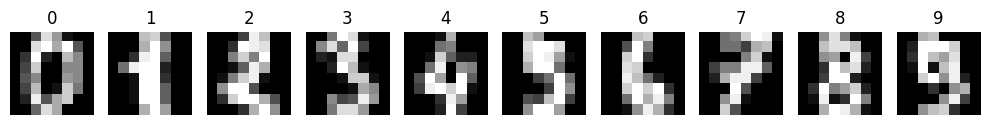

In [26]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
X = digits.images.reshape(len(digits.images), -1) / 16.0
y = digits.target.reshape(-1, 1)


encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

input_size = 64
hidden_size = 32
output_size = 10
learning_rate = 0.01

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


epochs = 1000
train_losses = []
for epoch in range(epochs):
    hidden_input = np.dot(X_train, W1) + b1
    hidden_output = relu(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    predictions = softmax(final_input)

    loss = cross_entropy_loss(predictions, y_train)
    train_losses.append(loss)
    
    loss = cross_entropy_loss(predictions, y_train)
    error_out = (predictions - y_train) / y_train.shape[0]
    dW2 = np.dot(hidden_output.T, error_out)
    db2 = np.sum(error_out, axis=0, keepdims=True)

    error_hidden = np.dot(error_out, W2.T) * relu_derivative(hidden_input)
    dW1 = np.dot(X_train.T, error_hidden)
    db1 = np.sum(error_hidden, axis=0, keepdims=True)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")




Epoch 0, Loss: 10.8858
Epoch 100, Loss: 4.1302
Epoch 200, Loss: 2.4402
Epoch 300, Loss: 1.7328
Epoch 400, Loss: 1.3588
Epoch 500, Loss: 1.1217
Epoch 600, Loss: 0.9584
Epoch 700, Loss: 0.8395
Epoch 800, Loss: 0.7491
Epoch 900, Loss: 0.6785


In [28]:
hidden_test = relu(np.dot(X_test, W1) + b1)
final_test = softmax(np.dot(hidden_test, W2) + b2)
predictions_test = np.argmax(final_test, axis=1)
actual_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions_test == actual_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 78.33%


Number of misclassified images: 78


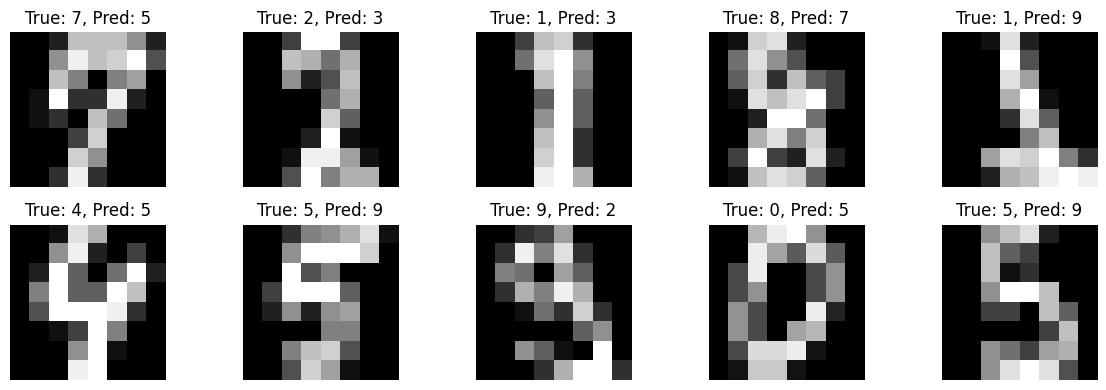

In [29]:
misclassified_indices = np.where(predictions_test != actual_test)[0]

print(f"Number of misclassified images: {len(misclassified_indices)}")

plt.figure(figsize=(12, 4))
for i, idx in enumerate(misclassified_indices[:10]):
    image = X_test[idx].reshape(8, 8)
    true_label = actual_test[idx]
    predicted_label = predictions_test[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


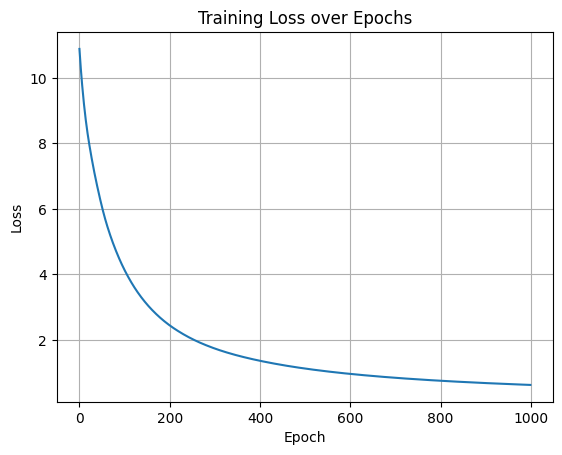

In [ ]:
plt.plot(train_losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
